In this notebook we test our hypothesis that to find the minimum set of memory-two strategies needed to explain
good nash, it is eneought to check the pure strategies.

In [281]:
from mpl_toolkits import mplot3d

import numpy as np

import matplotlib.pyplot as plt

import matplotlib

plt.rcParams["font.size"] = 15
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.lines import Line2D

In [225]:
import pandas as pd

from collections import Counter

import itertools

In [226]:
import os

In [227]:
os.chdir("/Users/glynatsi/rsc/reactive-two-bits/")

In [228]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader("main", "src/main.py").load_module()

from main import *

In [229]:
eq = SourceFileLoader("eq", "src/numerical_equilibria_n_bit_vs_n_bit.py").load_module()

from eq import *

In [230]:
import glob

In [247]:
import sympy as sym

**Data**

We numerically test 8 pure two-bit reactive strategies to see if they are Nash. There are 8 instead of 16 because we are only considering good two-bit reactive strategies.

In [231]:
files = glob.glob("data/pure_two_bit_against_memory_two/*")

In [232]:
columns = (
    ["", "ID"]
    + [f"p{i+1}" for i in range(16)]
    + ["label", "Sp", "Sq", "condition A", "condition B", "c", "b"]
)

player_columns = [f"p{i+1}" for i in range(16)]

In [233]:
dfs = [pd.read_csv(file, index_col=0, names=columns) for file in files]

In [234]:
df = pd.concat(dfs)

There was an issue with the simulations, and that is that for pure strategies we can have many absorbing states. 
We know that good strategies always have a payoff of (b - c) against themselves.

In [235]:
df['Sp'] = 1

In [236]:
condition_A = []

for i, row in df.iterrows():
    A = np.isclose(row['Sp'], row['Sq'], atol=10 ** -4) or row['Sp'] > row['Sq']
    
    condition_A.append(A)

In [237]:
df['condition A'] = condition_A

**Helping Functions**

In [238]:
def seperate_equilibria_and_non(df):
    per_player = df.groupby('ID')['condition A'].all()

    eq_players_ID = per_player[per_player == True].index

    noneq_players_ID = per_player[per_player == False].index
    
    return df[df['ID'].isin(eq_players_ID)], df[df['ID'].isin(noneq_players_ID)]

In [239]:
def all_invariant_distributions(M):
    stationaries = []

    eigenvalues, eigenvectors = np.linalg.eig(M.T)

    for index in np.where(np.isclose(eigenvalues, 1))[0]:

        eigenvectors_one = eigenvectors[:, index]

        stationary = eigenvectors_one / eigenvectors_one.sum()


        stationaries.append(stationary.real)

    return stationaries

In [240]:
eq, noneq = seperate_equilibria_and_non(df)

In [241]:
df['ID'].nunique(), eq['ID'].nunique()

(8, 3)

**which strategies explain Nash?**

In [242]:
groups = noneq[noneq['condition A'] == False].groupby('ID')

In [243]:
sets, ids = [], []

for i, group in groups:
    sets.append(group['label'].values)
    ids.append(group['ID'].unique())

In [244]:
[s for s in sets if ('N0' not in s) and ("N13107" not in s)]

[]

In [245]:
[(i, s) for i, s in enumerate(sets) if ('N0' not in s) and ("N13107" not in s)]

[]

In [246]:
[(i, s) for i, s in enumerate(sets) if ('N0' not in s) and ("N544"h not in s)]

[]

In [248]:
deterministic_strategies = list(
    itertools.product([0, 1], repeat=2 ** (2 * 2))
    )

In [31]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")

b, c = sym.symbols("b, c")

p_1 = 1

player = [p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4,
          p_1, p_2, p_1, p_2, p_3, p_4, p_3, p_4]

In [249]:
M = calculate_M_memory_two(deterministic_strategies[544], player, analytical=True)

ss = invariant_distribution_analytically(M)

In [250]:
exprN544 = ((ss @ np.array([b - c, -c, b, 0] * 4))[0] - (b - c)).factor()
exprN544

(b*p_2**2*p_3**2*p_4 - b*p_2**2*p_3**2 - b*p_2**2*p_3*p_4 - 2*b*p_2*p_3**2*p_4**2 + b*p_2*p_3**2*p_4 + 2*b*p_2*p_3*p_4**2 + b*p_2*p_3 - b*p_2*p_4 + b*p_3**2*p_4**3 - b*p_3*p_4**3 - b*p_3*p_4**2 - b*p_3 - b*p_4**3 + 2*b*p_4**2 + b + c*p_2**2*p_3**2 + c*p_2**2*p_3*p_4 - c*p_2*p_3**2*p_4 - 2*c*p_2*p_3*p_4**2 - c*p_2*p_3*p_4 - c*p_2*p_3 + c*p_2*p_4 + c*p_3*p_4**3 + c*p_3*p_4**2 + c*p_3*p_4 + c*p_3 - 2*c*p_4**2 - c*p_4 - c)/(p_2**2*p_3**2 + p_2**2*p_3*p_4 - p_2*p_3**2*p_4 - 3*p_2*p_3*p_4**2 - p_2*p_3*p_4 - p_2*p_3 + p_2*p_4 + 2*p_3*p_4**3 + p_3*p_4**2 + p_3*p_4 + p_3 - 3*p_4**2 - p_4 - 1)

In [251]:
sym.init_printing(False)

exprN544.subs({b:2, c:1})

(2*p_2**2*p_3**2*p_4 - p_2**2*p_3**2 - p_2**2*p_3*p_4 - 4*p_2*p_3**2*p_4**2 + p_2*p_3**2*p_4 + 2*p_2*p_3*p_4**2 - p_2*p_3*p_4 + p_2*p_3 - p_2*p_4 + 2*p_3**2*p_4**3 - p_3*p_4**3 - p_3*p_4**2 + p_3*p_4 - p_3 - 2*p_4**3 + 2*p_4**2 - p_4 + 1)/(p_2**2*p_3**2 + p_2**2*p_3*p_4 - p_2*p_3**2*p_4 - 3*p_2*p_3*p_4**2 - p_2*p_3*p_4 - p_2*p_3 + p_2*p_4 + 2*p_3*p_4**3 + p_3*p_4**2 + p_3*p_4 + p_3 - 3*p_4**2 - p_4 - 1)

In [265]:
def N544(p):
    _, p_2, p_3, p_4 = p
    return (
        2 * p_2 ** 2 * p_3 ** 2 * p_4
        - p_2 ** 2 * p_3 ** 2
        - p_2 ** 2 * p_3 * p_4
        - 4 * p_2 * p_3 ** 2 * p_4 ** 2
        + p_2 * p_3 ** 2 * p_4
        + 2 * p_2 * p_3 * p_4 ** 2
        - p_2 * p_3 * p_4
        + p_2 * p_3
        - p_2 * p_4
        + 2 * p_3 ** 2 * p_4 ** 3
        - p_3 * p_4 ** 3
        - p_3 * p_4 ** 2
        + p_3 * p_4
        - p_3
        - 2 * p_4 ** 3
        + 2 * p_4 ** 2
        - p_4
        + 1
    ) / (
        p_2 ** 2 * p_3 ** 2
        + p_2 ** 2 * p_3 * p_4
        - p_2 * p_3 ** 2 * p_4
        - 3 * p_2 * p_3 * p_4 ** 2
        - p_2 * p_3 * p_4
        - p_2 * p_3
        + p_2 * p_4
        + 2 * p_3 * p_4 ** 3
        + p_3 * p_4 ** 2
        + p_3 * p_4
        + p_3
        - 3 * p_4 ** 2
        - p_4
        - 1
    )

def N13107(p):
    return p[1] + p[2] -  3 / 2

def N0(p):
    return 2 * p[3] - 1

**The equilibria data**

In [254]:
files = glob.glob("data/big_data/*")

In [257]:
dfs = [pd.read_csv(file, index_col=0, names=columns) for file in files]

In [258]:
equilibria = pd.concat(dfs)

In [259]:
eq_twobit, noneq_twobit = seperate_equilibria_and_non(equilibria)

What we "know" from the numerical simulations is that Alternator and ALLD constrain the space of Nash.

We can validate that by taking the points that are Nash and checking the conditions.

In [271]:
for i, row in eq_twobit[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    A = np.isclose(N13107(p), 0, atol=10 ** -4) or  N13107(p) < 0
    B = np.isclose(N0(p), 0, atol=10 ** -4) or  N0(p) < 0    
    
    assert A and B

In [286]:
ever_true = []

for i, row in noneq_twobit[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    A = np.isclose(N13107(p), 0, atol=10 ** -4) or  N13107(p) < 0
    B = np.isclose(N0(p), 0, atol=10 ** -4) or  N0(p) < 0    
    
    if (A and B):
        ever_true.append(row)

In [287]:
ever_true

[]

We can check if N544 can also explain the Nash area.

In [288]:
for i, row in eq_twobit[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    A = np.isclose(N544(p), 0, atol=10 ** -4) or  N544(p) < 0
    B = np.isclose(N0(p), 0, atol=10 ** -4) or  N0(p) < 0    
    
    assert A and B

In [289]:
ever_true = []

for i, row in noneq_twobit[['p1', 'p2', 'p5', 'p6']].drop_duplicates().iterrows():
    
    p = row[['p1', 'p2', 'p5', 'p6']]
    
    A = np.isclose(N544(p), 0, atol=10 ** -4) or  N544(p) < 0
    B = np.isclose(N0(p), 0, atol=10 ** -4) or  N0(p) < 0    
    
    if (A and B):
        ever_true.append(row)

In [290]:
ever_true

[p1    1.00000
 p2    0.78983
 p5    0.73781
 p6    0.20234
 Name: 0, dtype: float64,
 p1    1.00000
 p2    0.98780
 p5    0.62297
 p6    0.14017
 Name: 0, dtype: float64,
 p1    1.00000
 p2    0.81201
 p5    0.82456
 p6    0.26467
 Name: 0, dtype: float64,
 p1    1.00000
 p2    0.93219
 p5    0.58841
 p6    0.01055
 Name: 0, dtype: float64,
 p1    1.00000
 p2    0.88415
 p5    0.83057
 p6    0.08807
 Name: 0, dtype: float64,
 p1    1.00000
 p2    0.85929
 p5    0.68240
 p6    0.17500
 Name: 0, dtype: float64,
 p1    1.00000
 p2    0.81387
 p5    0.84786
 p6    0.25983
 Name: 0, dtype: float64,
 p1    1.00000
 p2    0.88911
 p5    0.80860
 p6    0.34186
 Name: 0, dtype: float64,
 p1    1.00000
 p2    0.72972
 p5    0.91400
 p6    0.12604
 Name: 0, dtype: float64,
 p1    1.00000
 p2    0.80554
 p5    0.74701
 p6    0.05205
 Name: 0, dtype: float64,
 p1    1.00000
 p2    0.93006
 p5    0.80202
 p6    0.09963
 Name: 0, dtype: float64,
 p1    1.00000
 p2    0.70577
 p5    0.93174
 p6    0.

In [347]:
colors = ['green', 'blue', 'orange']

In [355]:
x = np.arange(0, 1 - 10 ** -3, 0.05)
y = np.arange(0, 1 - 10 ** -3, 0.05)
z = np.arange(0, 1 - 10 ** -3, 0.05)

xv, yv, zv = np.meshgrid(x, y, z)

In [356]:
Is0, Js0, Zs0 = np.where(np.isclose(N0((1, xv, yv, zv)), 0, atol=10 ** - 3))

Is13107, Js13107, Zs13107 = np.where(np.isclose(N13107((1, xv, yv, zv)), 0, atol=10 ** - 3))

Is544, Js544, Zs544 = np.where(np.isclose(N544((1, xv, yv, zv)), 0, atol=10 ** - 2))

In [358]:
labels = ['N0', 'N13107', 'N544']

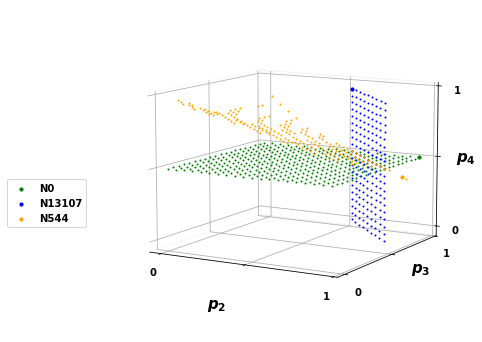

In [368]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(131, projection='3d')

axes = [ax1]
    
for k, indices in enumerate([[Is0, Js0, Zs0], 
                             [Is13107, Js13107, Zs13107],
                             [Is544, Js544, Zs544]]):
    
        Is, Js, Zs = indices
        
        for i, j, z in zip(Is, Js, Zs):
            
            ax1.scatter(xv[i, j, z],
                            yv[i, j, z],
                            zv[i, j, z],
                            s=1,
                            color=colors[k])
        ax1.scatter(xv[i, j, z],
                        yv[i, j, z],
                        zv[i, j, z],
                        s=10,
                        color=colors[k],
                        label=labels[k])
        
for ax in axes:
    ax.view_init(10, -60)
    ax.set_xticks([0, .5, 1])
    ax.set_yticks([0, .5, 1])
    ax.set_zticks([0, .5, 1])

    ax.set_xticklabels([0, "", 1])
    ax.set_yticklabels([0, "", 1])
    ax.set_zticklabels([0, "", 1])


    ax.annotate("$p_2$", (-0.05, -0.08), fontsize=15)
    ax.annotate("$p_3$", (.065, -0.06), fontsize=15)
    ax.annotate("$p_4$", (.09, 0.003), fontsize=15)
    
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
fig.legend(bbox_to_anchor=(.1, .5));